In [ ]:
!pip install kaggle



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 97% 1.03G/1.06G [00:07<00:00, 151MB/s]
100% 1.06G/1.06G [00:07<00:00, 149MB/s]


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!unzip -q /content/dogs-vs-cats.zip -d /content/dogs-vs-cats


In [ ]:

import tensorflow as tf
from tensorflow import keras

import pandas as pd

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory=r"/content/dogs-vs-cats/train",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(128, 128)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"/content/dogs-vs-cats/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128, 128)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
# def process(image,label):
#     image=tf.cast(image/255.,tf.float32)
#     return image,label
# train_ds=train_ds.map(process)
# validation_ds=validation_ds.map(process)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

def process(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label


# Apply normalization and augmentation to train_ds only
train_ds = train_ds.map(process).map(lambda x, y: (data_augmentation(x, training=True), y))
validation_ds = validation_ds.map(process)  # No augmentation here

# train_ds = train_ds.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
# validation_ds = validation_ds.cache().prefetch(tf.data.AUTOTUNE)

In [ ]:


# Define the CNN model
cnn = Sequential()





cnn.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(1, activation='sigmoid'))  # binary classification


In [ ]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,313,857 (12.64 MB)

 Trainable params: 3,313,409 (12.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
cnn.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

history=cnn.fit(train_ds, validation_data=validation_ds, epochs=10,callbacks=[early_stop])



Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 302ms/step - accuracy: 0.7910 - loss: 0.4564 - val_accuracy: 0.7834 - val_loss: 0.4621
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 298ms/step - accuracy: 0.7996 - loss: 0.4337 - val_accuracy: 0.7474 - val_loss: 0.5577
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 296ms/step - accuracy: 0.8154 - loss: 0.4134 - val_accuracy: 0.7490 - val_loss: 0.5812


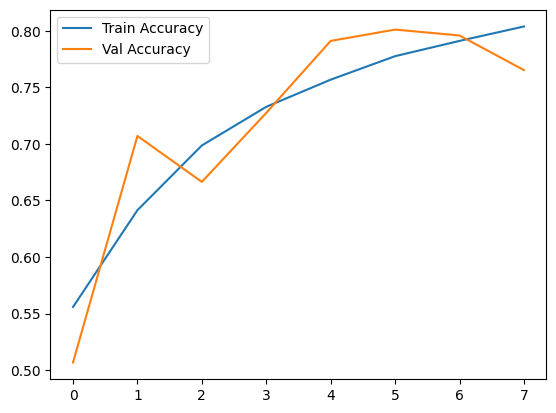

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = "/content/R.jpeg"  # Update path as needed
img = image.load_img(img_path, target_size=(128, 128))  # use 128x128 if that's your model input size
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
prediction = cnn.predict(img_array)

# Since it's binary classification, output will be probability
print("Raw prediction:", prediction[0][0])

if prediction[0][0] > 0.5:
    print("Prediction: Dog")
else:
    print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Raw prediction: 0.9932462
Prediction: Dog


In [ ]:
# prediction = cnn.predict(img_array)

# # Since it's binary classification, output will be probability
# print("Raw prediction:", prediction[0][0])

# if prediction[0][0] > 0.5:
#     print("Prediction: Dog")
# else:
#     print("Prediction: Cat")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Raw prediction: 0.63738704
Prediction: Dog


In [ ]:
!git clone https://github.com/Normal-106/cnn-dog-vs-cat

Cloning into 'cnn-dog-vs-cat'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [ ]:
!cp /content/cat_vsdog.ipynb /content/cnn-dog-vs-cat/


cp: cannot stat '/content/cat_vsdog.ipynb': No such file or directory
